### This is a spider project of Bilibili.com, a Chinese video sharing website. It attracts mostly Y generation people and is very famous for the feature: bullet comments (Danmaku in Japanese), as viewers can type in their real time short comments on the screen and share with everyone. You can't send the bullet comments unless you're a member. And the membership is also something worth talking about. To join the website, instead of simply typying in your user_name and password, you need to pass an exam. It's more like a test to check if you're an insider of the new generation world. Of course you can pick the genre you think you're good at: music, movie, cartoon, tech, history, etc. Increasing the difficulty of joining creates an insider proud and that's why it attracts so many yongsters as they know that they will find people have common interests here. More info here: https://en.wikipedia.org/wiki/Bilibili

#### - Goal
This project aims to create web scraping spider to get top videos on the webiste by month/week, indentify the hottest stat/idols in China and get an idea about their populairty by sentiment analysis.

#### - Content
* Website Scraping
* Tag Analysis
* Popularity demonstration of 3 idols
* Danmaku Analysis

#### -package: 
* urllib.request
* requests
* re
* bs4
* matplotlib
* wordcloud
* time
* datetime
* jieba

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import time
from datetime import datetime
from datetime import timedelta
import urllib.request
import re
from bs4 import BeautifulSoup
import requests
import matplotlib
import jieba
pd.set_option('display.max_columns', None) 

/kaggle/input/bilibili/datelist1.xlsx
/kaggle/input/chfont/SIMHEI.TTF
/kaggle/input/bilibili-data/spider.csv


## Web Scraping

In [2]:
# First we use urllib to build a spider. Just to scrpe videos from ranking charts doesn't need us to login.

opener = urllib.request.build_opener()
opener.addheaders = [('User-Agent','Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36'), 
                       ]
urllib.request.install_opener(opener)

### The auto-tune remix-themed content (oto MAD) videos are huge in China and compose a big part of content in B.com. More importantly, the content is all user generated, hence it's THE sensitive barometer for us to discover the most famous(if not popular) celebrities among the young generation.

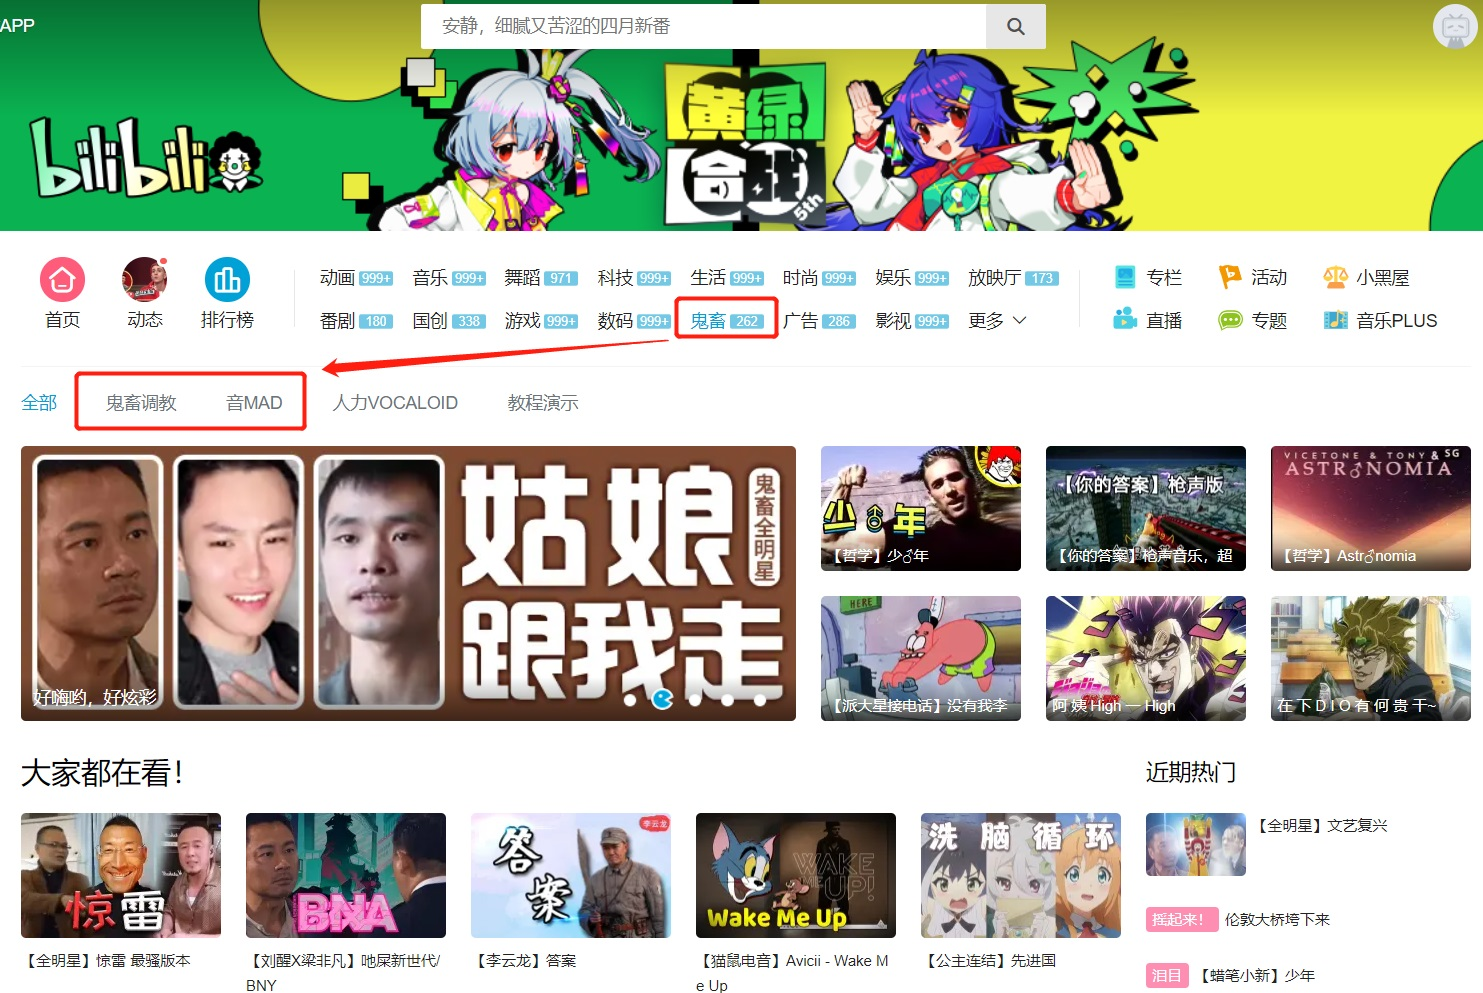

In [3]:
# The auto-tune-remix-themed content is mostly in the following two categories:Videomad/Vocalmad

def spider(start,end):
    madurl = 'https://s.search.bilibili.com/cate/search?&main_ver=v3&search_type=video&view_type=hot_rank&order=click&copy_right=-1&cate_id=26&page=1&pagesize=30&jsonp=jsonp&time_from={}&time_to={}'.format(str(start),str(end))

    guideurl = 'https://s.search.bilibili.com/cate/search?&main_ver=v3&search_type=video&view_type=hot_rank&order=click&copy_right=-1&cate_id=22&page=1&pagesize=30&jsonp=jsonp&time_from={}&time_to={}'.format(str(start),str(end))

    mad = opener.open(madurl).read().decode("utf-8","ignore")
    guide = opener.open(guideurl).read().decode("utf-8","ignore")

    aid = '"arcurl":"(.*?)",'
    tag = '"tag":"(.*?)",'
    mid = '"mid":(.*?),'
    tit = '"title":"(.*?)"}'
    review = '"review":(.*?),'
    play = '"play":"(.*?)"'
    danmu ='"video_review":(.*?),'
    fav = '"favorites":(.*?),'

    aid1 = re.compile(aid).findall(mad)
    aid2 = re.compile(aid).findall(guide)
    aid0 = aid1 + aid2
    
    tag1 = re.compile(tag).findall(mad)
    tag2 = re.compile(tag).findall(guide)
    tag0 = tag1 + tag2

    mid1 = re.compile(mid).findall(mad)
    mid2 = re.compile(mid).findall(guide)
    mid0 = mid1 + mid2

    tit1 = re.compile(tit).findall(mad)
    tit2 = re.compile(tit).findall(guide)
    tit0 = tit1 + tit2
    
    play1 = re.compile(play).findall(mad)
    play2 = re.compile(play).findall(guide)
    play0 = play1 + play2
    
    review1 = re.compile(review).findall(mad)
    review2 = re.compile(review).findall(guide)
    review0 = review1 + review2
    
    danmu1 = re.compile(danmu).findall(mad)
    danmu2 = re.compile(danmu).findall(guide)
    danmu0 = danmu1 + danmu2
    
    fav1 = re.compile(fav).findall(mad)
    fav2 = re.compile(fav).findall(guide)
    fav0 = fav1 + fav2
    
    if (len(aid0) == len(tag0) == len(mid0) == len(tit0) == len(review0) == len(play0) == len(danmu0) == len(fav0) ):
        df = pd.DataFrame(list(zip(aid0,tag0, mid0,tit0,review0,play0,danmu0,fav0)), 
               columns =['url','tag', 'mid','tit','review','play','danmu','fav']) 
        df['aid'] = re.compile('av(\d*)').findall(str(df['url']))
        
        for i in range(0,len(df)):
            df['tag'][i] = eval('u"'+df['tag'][i]+'"')
            df['tit'][i] = eval('u"'+df['tit'][i]+'"')
            df['url'][i] = df['url'][i].replace("\\","")
    
        df['start'] = str(start)
        df['end'] = str(end)
    else:
        df = pd.DataFrame()
        print(len(aid0) ,len(tag0) ,len(mid0), len(tit0) ,len(review0), len(play0), len(danmu0), len(fav0))
    return df

In [4]:
# import a file for creating date range:2018/01/01 - 2020/04/19

period = pd.read_excel('../input/bilibili/datelist1.xlsx')
period.head()

,start,end
0,20180101,20180107
1,20180108,20180114
2,20180115,20180121
3,20180122,20180128
4,20180129,20180204


In [5]:
# Store data

dataall = []
dataall=pd.DataFrame(dataall)   

for i in range(period.shape[0]):
    spd = spider(period['start'][i],period['end'][i])
    if len(spd) > 0:
        dataall = dataall.append(spd)
    else:
        print("error:"+str(i))
    print(str(i))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


In [6]:
# We now get Top 30 videos for each category every week for more than 2 years. Each week has 60 hot videos with their url, creator-made tags, creator id, video title, review_num, play_num, danmaku_num, add_to_favorite_num, video id and the week_num.

dataall.head()

,url,tag,mid,tit,review,play,danmu,fav,aid,start,end
0,http://www.bilibili.com/video/av17838133,"Fa乐器,汤姆琴魔,音MAD,猫和老鼠,金馆长,逆风笑,Duang,哲学,花Q,人工智障,U...",100952230,【原曲不使用】最终鬼畜Fa♂Q－10种鬼畜乐器演奏，爱酱真是太萌了（左右声道）,508,203313,809,4162,17838133,20180101,20180107
1,http://www.bilibili.com/video/av17965675,"音MAD,噔噔咚,真夏の夜の淫夢",11375918,噔噔咚！（云々）,607,120483,239,2152,17965675,20180101,20180107
2,http://www.bilibili.com/video/av17833853,"最終鬼畜妹フランドール・S,東方乱々流,音MAD,蓝蓝路,ドナルド,1\/1はM.C.D.投...",12505040,【合作】M.C.Donald会不灭吗？最終鬼畜蓝蓝路【十周年纪念】,826,51189,2605,3046,17833853,20180101,20180107
3,http://www.bilibili.com/video/av17836049,"音MAD,哲学,自恋刑警,蕉迟但到,FA乐器",3985644,【哲学】自恋刑♂警,145,35559,429,858,17836049,20180101,20180107
4,http://www.bilibili.com/video/av17488697,"MEGALOVANIA,音MAD,创价学会,エア本爆発祭18,久本爆发祭18,必須アモト酸,...",10081533,【UNDERTALE】CULTALOVANIA【创价学会】,205,28979,118,1075,17488697,20180101,20180107


In [7]:
len(dataall)

7200

In [8]:
dataall=dataall.reset_index()
dataall = dataall.drop(['index'], axis=1)
dataall.to_csv(r'spider.csv',encoding='utf-8-sig')

In [9]:
#dataall = pd.read_csv('../input/bilibili-data/spider.csv')

## Tag Anlaysis

#### Tags are used to identify the video content. We can use this information directly.

In [10]:
# The tag is str, sep with ','. So first we collect all words into a long string and split them with ','.

taglist=str()
for i in range(len(dataall)):
    taglist = taglist + str(dataall['tag'][i]) + ','
tagword = taglist.split(',')

#take a look
tagword[0:5]

['Fa乐器', '汤姆琴魔', '音MAD', '猫和老鼠', '金馆长']

In [11]:
# Count the occurence of all words.

from collections import Counter

tag_stat = Counter(tagword)
tag_stat.most_common(100)

[('鬼畜调教', 3313),
 ('音MAD', 3176),
 ('鬼畜', 1636),
 ('搞笑', 1395),
 ('洗脑循环', 830),
 ('洗脑', 503),
 ('哲学', 486),
 ('原曲不使用', 430),
 ('自制', 417),
 ('新人', 406),
 ('恶搞', 394),
 ('蜜汁带感', 385),
 ('全能打卡挑战', 352),
 ('电音', 328),
 ('全明星', 287),
 ('bilibili新星计划', 287),
 ('东方', 283),
 ('卢本伟', 269),
 ('新人都是怪物', 252),
 ('猫和老鼠', 243),
 ('丧心病狂', 230),
 ('五五开', 218),
 ('孙笑川', 216),
 ('蔡徐坤', 196),
 ('奥利给', 188),
 ('面筋哥', 184),
 ('新人向', 178),
 ('rap', 162),
 ('COOKIE☆', 156),
 ('暑期爆肝挑战', 155),
 ('人力VOCALOID', 154),
 ('音乐', 153),
 ('鬼畜素材', 146),
 ('东方PROJECT', 144),
 ('传说之下', 141),
 ('有毒', 139),
 ('FA乐器', 135),
 ('海绵宝宝', 125),
 ('UNDERTALE', 122),
 ('创价学会', 120),
 ('梁非凡', 118),
 ('岛市老八', 117),
 ('周杰伦', 109),
 ('吴亦凡', 108),
 ('老八', 108),
 ('RAP', 107),
 ('YTPMV', 106),
 ('鬼畜配音', 102),
 ('二次元鬼畜', 101),
 ('真夏の夜の淫夢', 100),
 ('波澜哥', 100),
 ('章鱼哥', 100),
 ('JOJO的奇妙冒险', 99),
 ('葛平', 97),
 ('哲♂学', 96),
 ('刘醒', 94),
 ('我的世界', 92),
 ('音mad', 90),
 ('英雄联盟', 87),
 ('毁童年', 87),
 ('搞笑视频', 86),
 ('PDD', 86),
 ('李云龙', 83),
 (

In [12]:
# Del some words. Some of them are event names, category names and some adjectives creators usually use to describe their video.

stop_words = ['鬼畜调教','音MAD','音mad','洗脑','搞笑','洗脑循环','原曲不使用','恶搞','全能打卡挑战','bilibili新星计划','暑期爆肝挑战','人力VOCALOID','创作新秀奖','2019新人嘉年华', 'VAN样', '新星计划','猫和老鼠鬼畜配音','全勤挑战','搞笑视频','自制','鬼畜','新人','JOJO', 'Vtuber','寒假不再咕咕咕','亮剑','合作','铁道音MAD','van','LOL','WINDOWS','东方project','干杯！校园季','巨魔','老八']
for s in stop_words:
    del tag_stat[s]

(-0.5, 5999.5, 2999.5, -0.5)

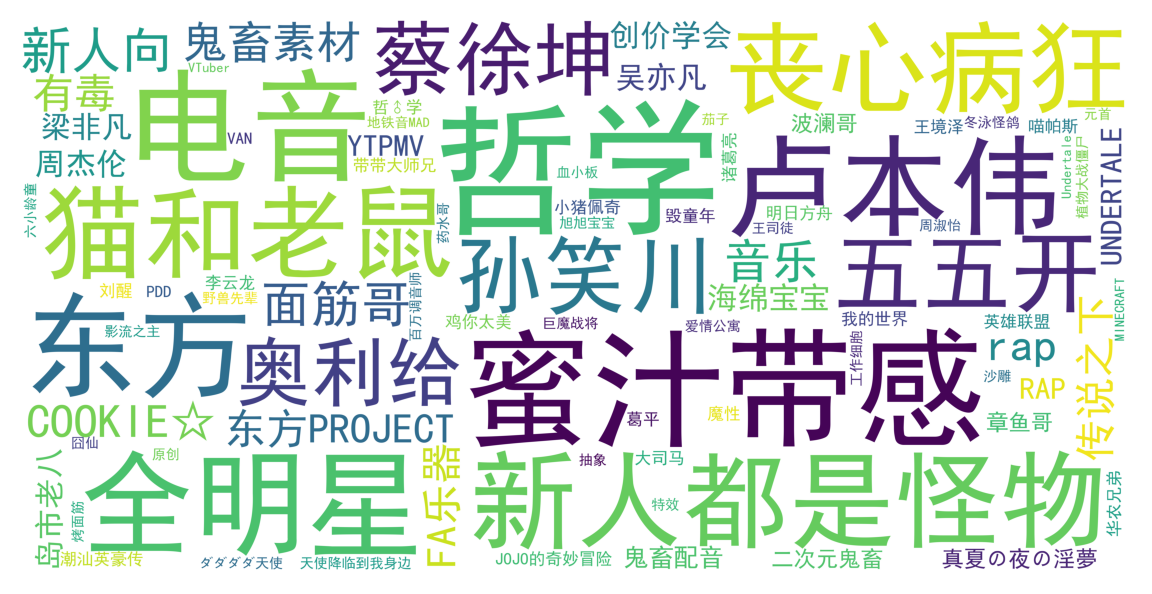

In [13]:
# Create a wordcloud to demonstrate the most popular contents.
# The Chinese caracter isn't supported, so I have to import my own font.

import imageio
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator

font_path='../input/chfont/SIMHEI.TTF'

wc = WordCloud(max_words=100, 
               #stopwords=stop_word,
               scale = 15,
              #max_font_size=200, 
              font_path=font_path, 
              background_color='white',
               #width=1000,  
               #height=860  
              )

#back_color = 'red'
#image_colors = ImageColorGenerator(back_color)
plt.figure(figsize=(8,8),dpi=180)
wc.generate_from_frequencies(tag_stat)
plt.imshow(wc)
plt.axis('off')

In [14]:
# Since all these tags are from different categories. I divide them into 3 types: Person, Events, Materials.

dataall['tag_list'] = np.nan
for i in range(len(dataall)):
    try:
        dataall['tag_list'][i] = dataall['tag'][i].split(',')
    except AttributeError as reason:
        print(str(reason)+str(i))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
dataall.dtypes

url         object
tag         object
mid         object
tit         object
review      object
play        object
danmu       object
fav         object
aid         object
start       object
end         object
tag_list    object
dtype: object

In [16]:
dataall[dataall['play'] == '--']

,url,tag,mid,tit,review,play,danmu,fav,aid,start,end,tag_list
447,http://www.bilibili.com/video/av7084962,"真夏の夜の淫夢,音MAD,CONCON",456373,con↑con↓,73,--,10,172,7084962,20180219,20180225,"[真夏の夜の淫夢, 音MAD, CONCON]"


In [17]:
# There's an old video has wrong play_num. Simply drop it.

print(dataall.iloc[447,])
dataall = dataall.drop([447])

url         http://www.bilibili.com/video/av7084962
tag                             真夏の夜の淫夢,音MAD,CONCON
mid                                          456373
tit                                        con↑con↓
review                                           73
play                                             --
danmu                                            10
fav                                             172
aid                                         7084962
start                                      20180219
end                                        20180225
tag_list                    [真夏の夜の淫夢, 音MAD, CONCON]
Name: 447, dtype: object


In [18]:
# change the data type as we will do some calculation later.

dataall['play'] = dataall['play'].astype('int')
dataall['review'] = dataall['review'].astype('int')
dataall['danmu'] = dataall['danmu'].astype('int')
dataall['fav'] = dataall['fav'].astype('int')

In [19]:
#tidy-up

dataall = dataall.reset_index()
dataall = dataall.drop(['index'], axis=1)

In [20]:
# Now we sum up the play_num for each tag by week. Note that videos has multiple tags, so they will have the same play_num and danmu_num if they are from the same clip.

tag = []
play = []
danmu = []
week = []


for i in range(len(dataall['tag_list'])):
    try:
        for j in range(len(dataall['tag_list'][i])):
            try:
                tag = tag + [dataall['tag_list'][i][j]]
                play = play + [dataall['play'][i]]
                danmu = danmu + [dataall['danmu'][i]]
                week = week + [dataall['start'][i]]
            except TypeError as reason:
                print(str(reason) + str(i)+":"+str(j))
    except TypeError as reason:
        print(str(reason) + str(i))


df = pd.DataFrame(list(zip(tag, play,danmu,week)), 
               columns =['tag', 'play','danmu','week']) 
df.head()

,tag,play,danmu,week
0,Fa乐器,203313,809,20180101
1,汤姆琴魔,203313,809,20180101
2,音MAD,203313,809,20180101
3,猫和老鼠,203313,809,20180101
4,金馆长,203313,809,20180101


In [21]:
# Create B.com dictionary. Seperate the tags into 3 categories: Person, Event, Material.

tagindex = { 'p':['蔡徐坤','孙笑川','卢本伟','五五开','吴亦凡', 'PDD','药水哥','花泽香菜','自信姐','肖战','葛平','古力娜扎','乔碧萝','黄晓明','刘德华','川普','周润发','周淑怡','pdd','周杰伦','六小龄童','五开','giao哥','王境泽','朱丹','坤坤','鲲学家','赵本山','朱广权','马云','马化腾','面筋哥','张一山','大张伟','贝爷','DONALDTRUMP','肖战','宋丹丹','韩红','娜扎','全明星RAP','高音哥','VITAS','杰哥','billie eilish','罗志祥','张大仙','杨紫','papi酱','成龙','渣渣辉','孟鹤堂','阎鹤祥','德云社','周九良','岳云鹏','郭德纲','郭麒麟','孙越','周星驰','华晨宇','奥巴马','特朗普','杨永信','章金莱','华农兄弟','梅西','蒋昌建','刘波','张翰','郑爽','MC天佑','MC','GIAO','giao哥','Giao哥','cxk','腾格尔','冯巩','郭冬临','吴军豹','撒贝宁','王嘉尔','白敬亭','魏大勋','黄明昊','GEE','局座','孙红雷','韩美娟','王刚','徐梦圆','王一博','林欢','翟天临','林同学','Trump','米津玄师','李永乐','王源','黄子韬','雷军','王镜泽','德国BOY','刘慈欣','陈冠希','杨超越','王尼玛','唐治萍','蔡依林','蔡明','郭老师','久本雅美', '陈小春', '敖厂长','潘玮柏', '张家辉', '古天乐', '陈浩民', '刘国梁', '张继科', '马龙', '洛天依', '筷子兄弟', '赵丽蓉', 'MC传奇', '周鸿祎', '科比', '马飞','马飞飞','李连杰', '郭富城', 'Giao', '729声工场', '巨石强森', '抖森', '杰森斯坦森', '李玟', 'LexBurner', '佟大为', '伊丽莎白鼠', '王菊', 'MC传奇', 'MOMOLAND', '林俊杰', '朱一龙', '白宇', 'EMINEM', '火箭少女101','王心凌','李健', 'mc石头', '天才哥', '许嵩', '庞麦郎', '张宇', '罗翔', 'Jony J', '李熙凝', '秦牛正威', '迪丽热巴','贾斯汀比伯','旭旭宝宝',
                 ],
        'e':['全能打卡游戏','bilibili新星计划','黄绿合战4th','黄绿合战','抗击肺炎大作战','暑期爆肝挑战','227大团结','227','227事件','AO3','2019新人嘉年华','2019高考应援','全能打卡挑战','#创作新秀奖#','创作新秀奖','再见2018','再见2019','寒假不再咕咕咕','百万剪辑师挑战','双十一种草大会','高考','全勤挑战','NBA篮球大使','干杯！校园季','开学','新年','百万调音师','过年','花式拜年大赛','新星计划','拜年','2019拜年祭','拜年祭','2018拜年祭单品', '干杯！世界杯', '开学大作战','双十一','圣诞节','搞笑竞技大赛'],
        'm':['鸡你太美','枪弹轨迹','海绵宝宝','影流之主','斗地主','岛市老八','鸡','诸葛亮','山东卫视','该来的还是来了','我的女友要征婚','打开你的心结','沙雕','恋爱循环','赌神','篮球','爱情公寓','冬泳怪鸽','派大星','猫和老鼠','李云龙','老福特','王司徒','环太平洋','饭圈','机甲战士','芒种','窝窝头','王思妇','亮剑','我和你荡秋千','爱情公寓','爱情公寓5','家有儿女','游乐王子','钉钉','巨魔','巨魔战将','曾小贤','吕子乔','刘星','老八','波澜哥','野狼disco','Flower dance','踩点','得得得','带带大师兄','你太美','唐伯虎点秋香','头号玩家','凌霄','巴啦啦小魔仙','英雄联盟','JOJO的奇妙冒险','jojo','jojo的奇妙冒险','钉钉','改革春风吹满地','米奇妙妙屋','嘻唰唰','还珠格格','元首','米Hotel','闹太套','三国','中国话','穷哈','雨女无瓜','可口可乐','偶像练习生','明日方舟','LOL','章鱼哥','头文字D','短笛大魔王','御坂美琴','先进国','监狱风云','萌宠','赌怪','张伟','诸葛大力','YOUTUBE','午夜凶铃','贞子','影 流 之 主','七月七爱恋','琵琶行','skr','SKR','吃鸡','窝窝头一块钱四个','葫芦娃','打篮球','葫芦兄弟','野味','金馆长','春晚','夏东海','魔兽世界','克罗地亚狂想曲','奥特曼','万合天宜','复仇者联盟','灭霸','仙剑奇侠传','咒怨','瞬狱影杀阵','王者荣耀','王者农药','绝地求生','漫威','中餐厅','夏雪','藤原千花','意识流','豫章书院','食神','哪吒','我的世界','dnf','DNF','欢乐斗地主','梁非凡','西游降魔篇','快乐星球','楚云飞','JOJO','骚瑞','骚凹瑞','武林外传','一人饮酒醉','假面骑士','图图','WINDOWS','WIN10','天气之子','小猪佩奇','熊出没','千本樱','釜山行','金坷垃','小黄人','死侍','你好骚啊','信誓旦旦','元首的愤怒','永乐大帝','陈情令','蓝忘机','魏无羡','魔道祖师','天使降临到我身边','大司马','和珅','西游记','大碗宽面','钢铁侠','拳皇','火影忍者','空条承太郎','那个男人','鬼泣5','嘴巴嘟嘟','爱的魔力转圈圈','热血高校','地铁','我的英雄学院','炉石传说','星际争霸','文体两开花','PRODUCE 48','我要吸旺仔牛奶','生僻字','洪世贤','六学','东方PROJECT','东方project', 'UNDERTALE','传说之下','YTPMV','ダダダダ天使', '囧仙','MINECRAFT','COOKIE☆','VTuber','VAN','潮汕英豪传', '喵内', '东方鬼形兽','辉夜大小姐想让我告白','文艺复兴','刘醒','黄金之风','SANS','虚拟YOUTUBER','虚拟主播', '喵帕斯','植物大战僵尸','东方馅挂炒饭','别人的世界', '真夏の夜の淫夢', '東方乱々流', '蓝蓝路', '创价学会', '古典派淫夢', '星之卡比', '地铁音MAD', '贪玩蓝月', '恋与制作人', '马冬梅', '高达', '御坂琴魔', '旺仔牛奶', '地下城与勇士', '哆啦A梦', '青蛙旅行', '中国有嘻哈','星球大战', '中国梦之声','巴拉拉小魔仙', '你的名字', '成龙历险记', '花Q', '海草舞', '倒悬的橘子', '饿狼传说', '烤面筋', '灵魂撒盐', '孙悟空','亿万调音师', '爱酱', '第五人格', 'fantastic baby', '起风了', 'B站方文山', '唐伯虎', '崩坏3', '崩坏三','panama', '流浪诗人', '吟游诗人','大秦帝国', '红警', '情深深雨蒙蒙', '复仇者联盟3',  '北斗神拳', '世界杯', 'mugen', '拼多多', '创造101','NBA', 'Megalo Box', '学猫叫', '彩虹六号', '镇魂', '工作细胞', '红色警戒', '中国新说唱', '中国好声音','来自星星的你', 'DOTA2', '奥运会', '卡路里', '创造101', '生化危机7', '1818黄金眼', '泽野螳螂', '我的滑板鞋', 'HandClap', '全员恶人', 'FATE', '底特律：变人', '极乐净土', 'UNITY', '铁齿铜牙纪晓岚', '纪晓岚', '太吾绘卷', '沙漠骆驼', '逮虾户', '名侦探柯南','底特律', '好嗨哟', 'havana', '大宋提刑官', '多啦A梦', 'RED ZONE', 'Godzilla','处处吻','抬棺','黑人抬棺', '甄嬛传', '鬼火少年', '淡黄的长裙', '青春有你2', '淡黄的长裙，蓬松的头发', '东方夏银梦', '咱们裸熊', '口袋妖怪', '宠物小精灵', '精灵宝可梦', '祖安', '厚大法考','动森'
             ]
        }

In [22]:
# Assign class type to data

df['class']= np.nan
for i in range(len(df)):
    if df['tag'][i] in tagindex['p']:
        df['class'][i] = 'p'
    elif df['tag'][i] in tagindex['e']:
        df['class'][i] = 'e'
    elif df['tag'][i] in tagindex['m']:
        df['class'][i] = 'm'
    else:
        df['class'][i] = 'non'
        
df.to_csv(r'df.csv',encoding='utf-8-sig')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packa

In [23]:
# Now we get the overall top 10 celebrities in Bilibili.

topplayp = df[df['class']=='p'].play.groupby(df.tag).sum().sort_values(ascending= False)
topplaym = df[df['class']=='m'].play.groupby(df.tag).sum().sort_values(ascending= False)

topplayp.head(10)

tag
卢本伟    355483556
孙笑川    264515078
五五开    264265902
蔡徐坤    257376397
吴亦凡    153904611
面筋哥    152614300
PDD    127044278
赵本山    100172012
王境泽     85098420
周杰伦     75007976
Name: play, dtype: int64

#### The top 10 celebrities are E-sports players, Internet singers, Internet celebrities, emerging idols, a comedian and a singer.

In [24]:
matplotlib.font_manager.FontProperties().get_family()

['sans-serif']

Wanted to create the plot, but the Chinese characters just can't show up. I've tried several solutions I found online, but...
So I put a screenshot I runned on my computer.

topplayp.head(10).plot(kind = 'barh')

In [25]:
#matplotlib.rcParams['font.family'] = font_path
#myfont = matplotlib.font_manager.FontProperties(fname= font_path)  
#myfont = matplotlib.font_manager.FontProperties(fname="Droid Sans Fallback")
#matplotlib.rcParams['axes.unicode_minus']=False#解决保存图像时负号'-'显示为方块的问题
#plt.rcParams['font.sans-serif']=['SIMHEI'] 
#plt.rcParams['font.family'] = ['Droid Sans Fallback']# 用来正常显示中文标签  
#plt.rcParams['font.family'] = ['Times New Roman']


#topplayp.head(10).plot(kind = 'barh')

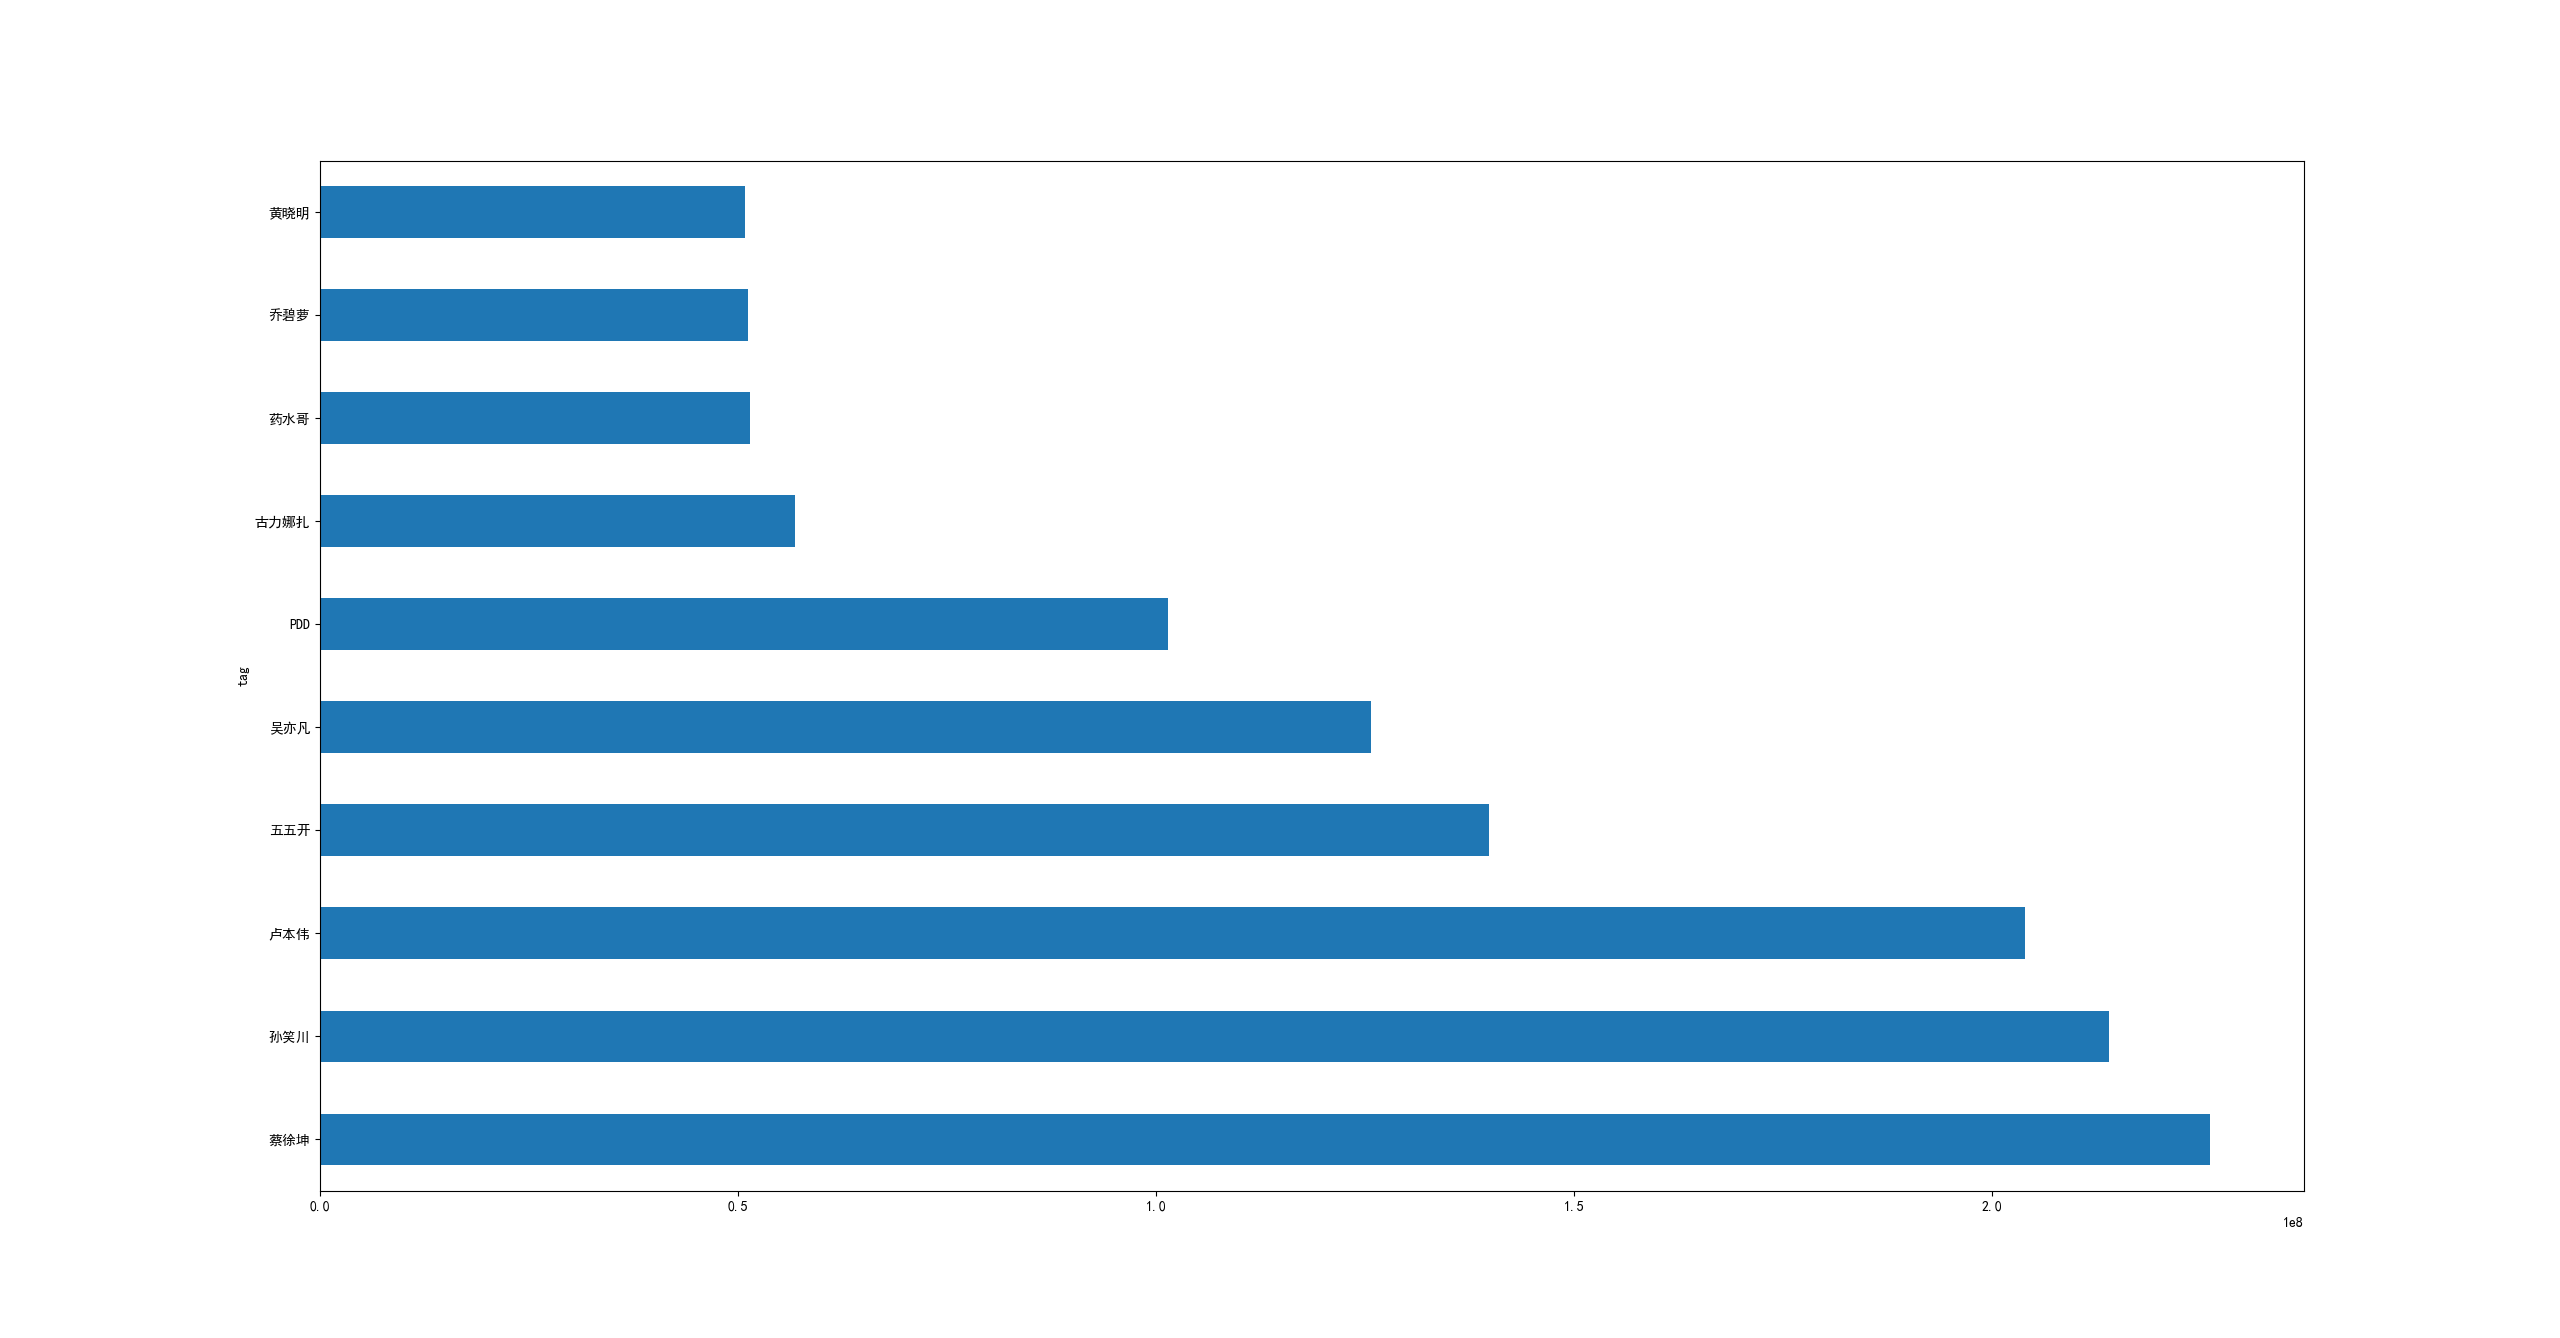

In [26]:
# Create table data by week, tag, class and sorted by play_num

topplay = df.groupby(['week', 'tag','class'], as_index=False)['play'].sum().sort_values(by=['week','play'],ascending= False)

topplay.to_excel(r'topplay.xlsx',encoding='utf-8-sig')

for i in range(len(topplay)):
    topplay['week'][i] = datetime.strptime(str(topplay['week'][i]),'%Y%m%d').date()
    
topplay.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,week,tag,class,play
27661,2020-04-13,鬼畜调教,non,23701389
27564,2020-04-13,搞笑,non,10179723
27666,2020-04-13,黄绿合战,e,9989657
27667,2020-04-13,黄绿合战5th,non,9989657
27673,2020-04-13,黑人抬棺,m,9534410


In [27]:
# Instead the overall Top 10, what about the everyweek performance? 
# Do bilibili fans stick to their favorites for a long time in this fast-food environment?

from matplotlib import style
style.use('fivethirtyeight')

p_week = topplay[topplay['class'] == 'p']
p_week = p_week.reset_index()
p_week['Rank'] = p_week.groupby(by=['week'])['play'].transform(lambda x: x.rank(method='first', ascending=False))
topweek = p_week[p_week['Rank'] == 1]
topweek = topweek.reset_index()
topweek2020 = topweek[:15]
topweek2019 = topweek[15:67]
topweek2018 = topweek[67:]

In [28]:
# Now because all Chinese Characters can't show up, I just just use my screen shot instead. 
# Here it is, the top celebrity of each week for 3 years.

''''
top2020 = plt.bar(topweek2020['week'],topweek2020['play'],width = 5)


# zip joins x and y coordinates in pairs
for x,y,z in zip(topweek2020['week'],topweek2020['play'],topweek2020['tag']):

    label = str(z)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 size = 10,
                 ha='center') # horizontal alignment can be left, right or center
''''

SyntaxError: EOL while scanning string literal (<ipython-input-28-341c4f874798>, line 19)

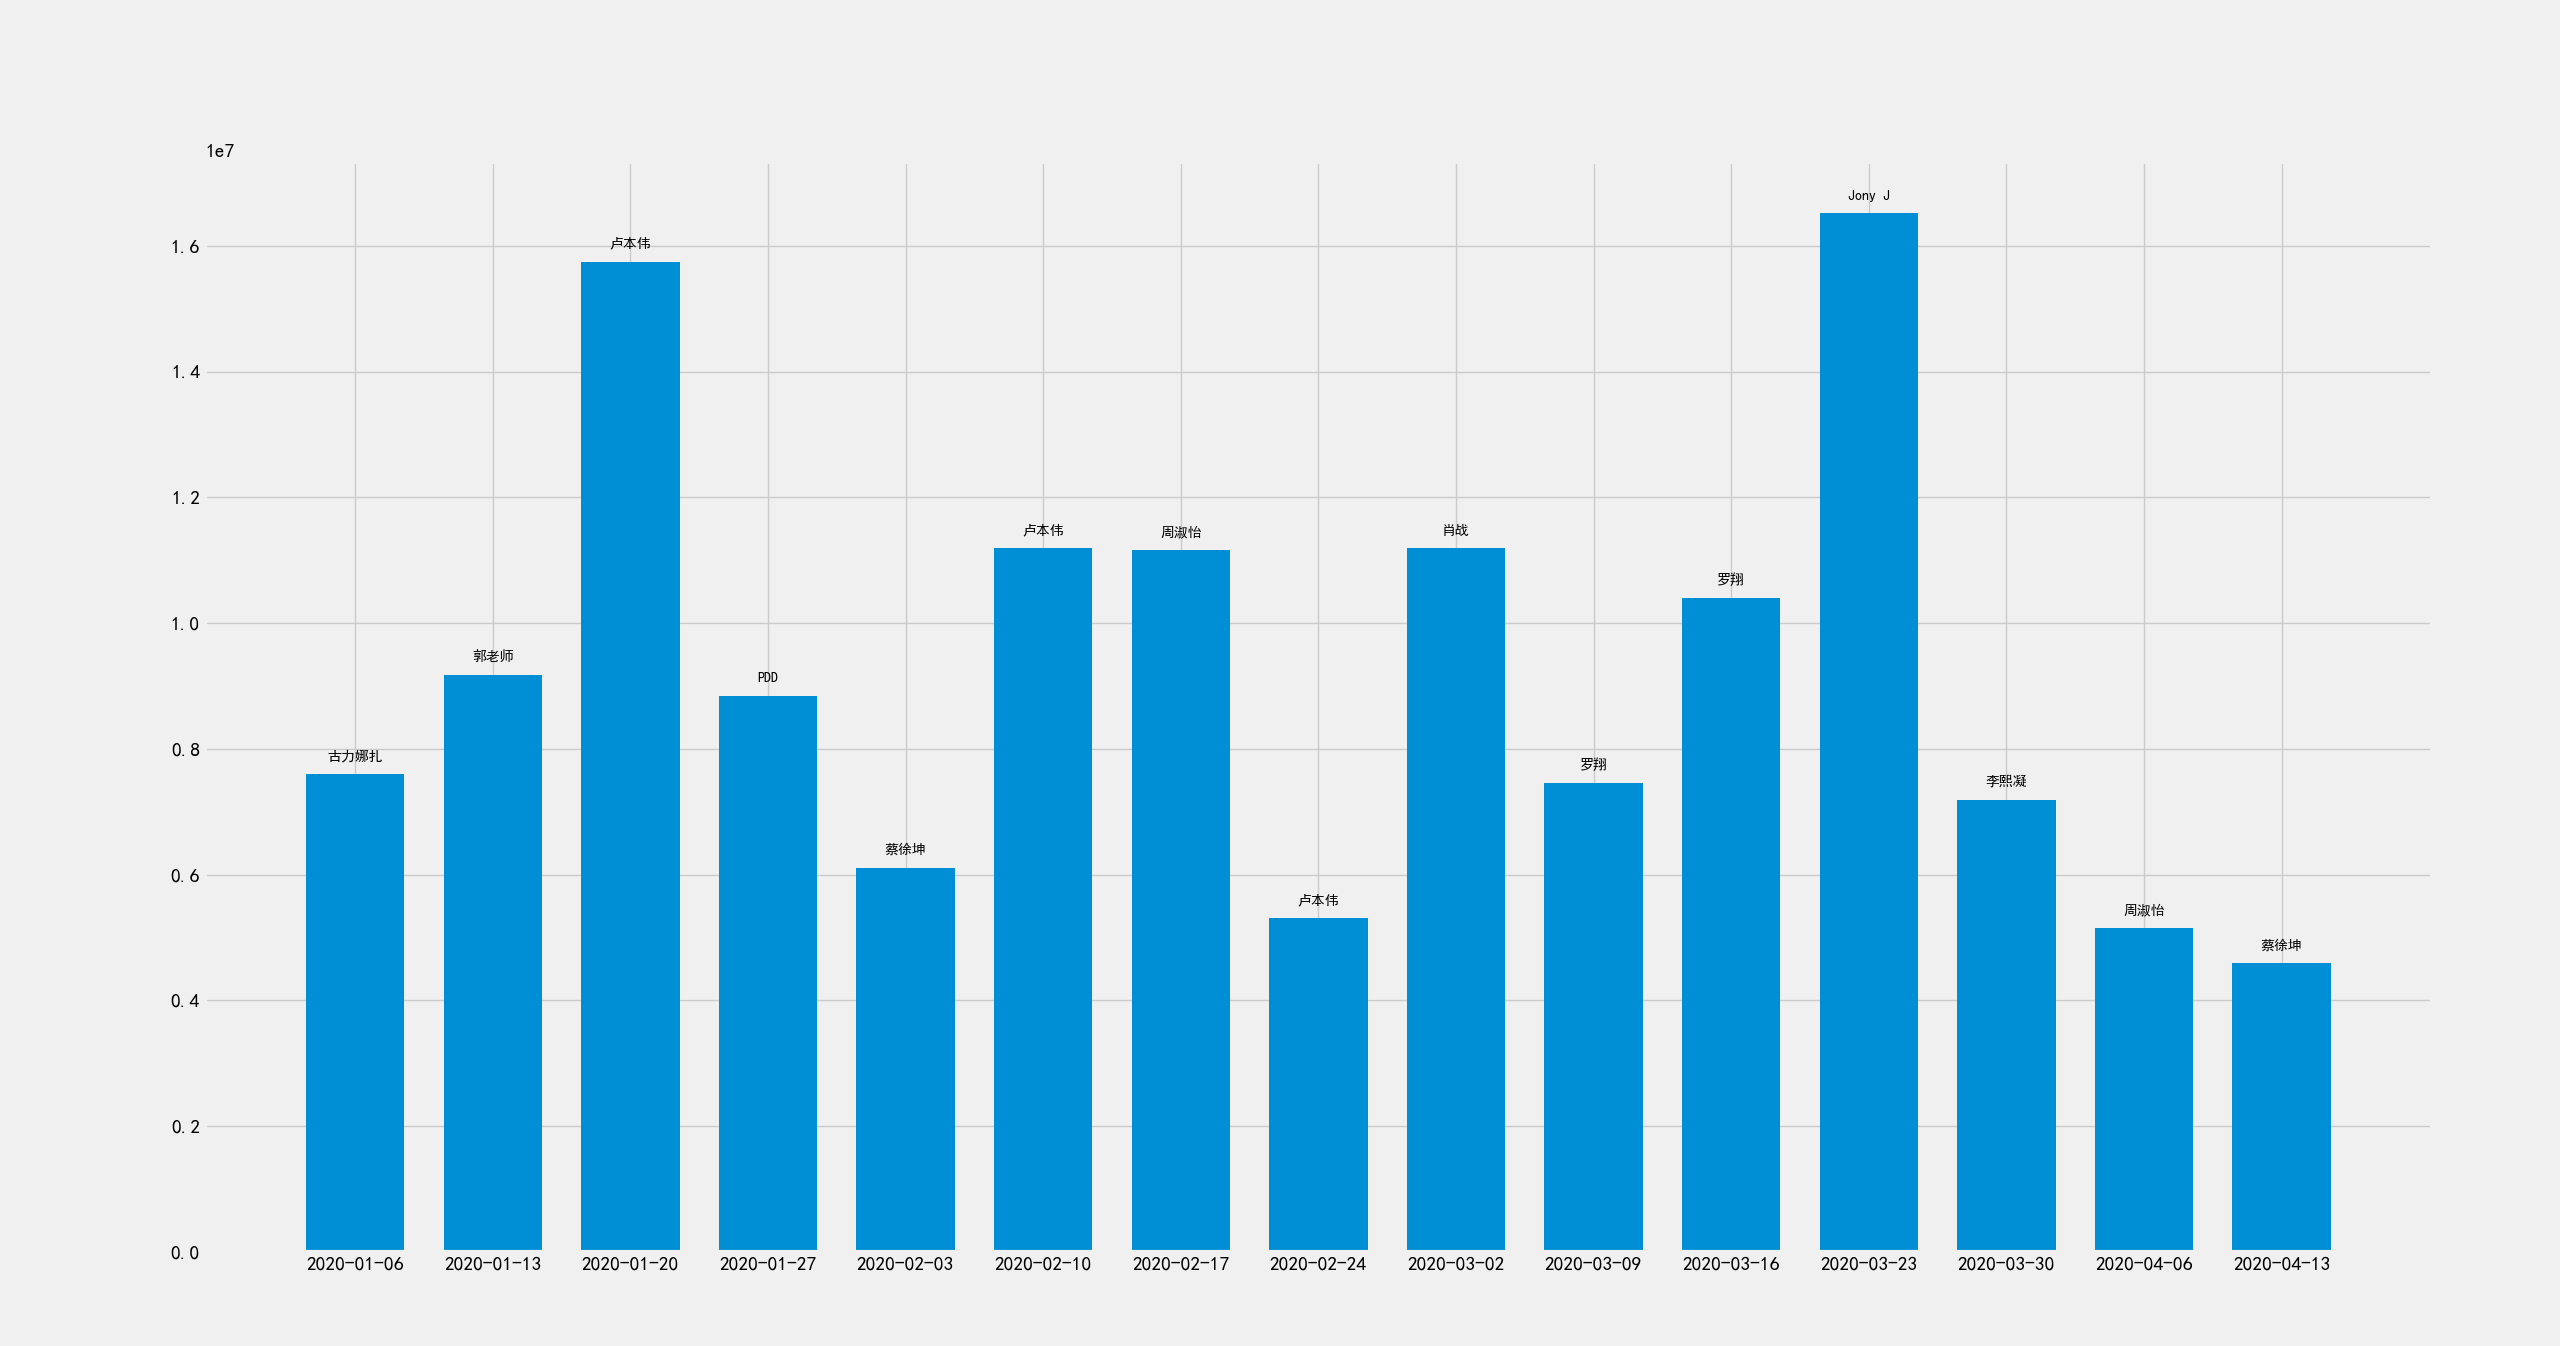
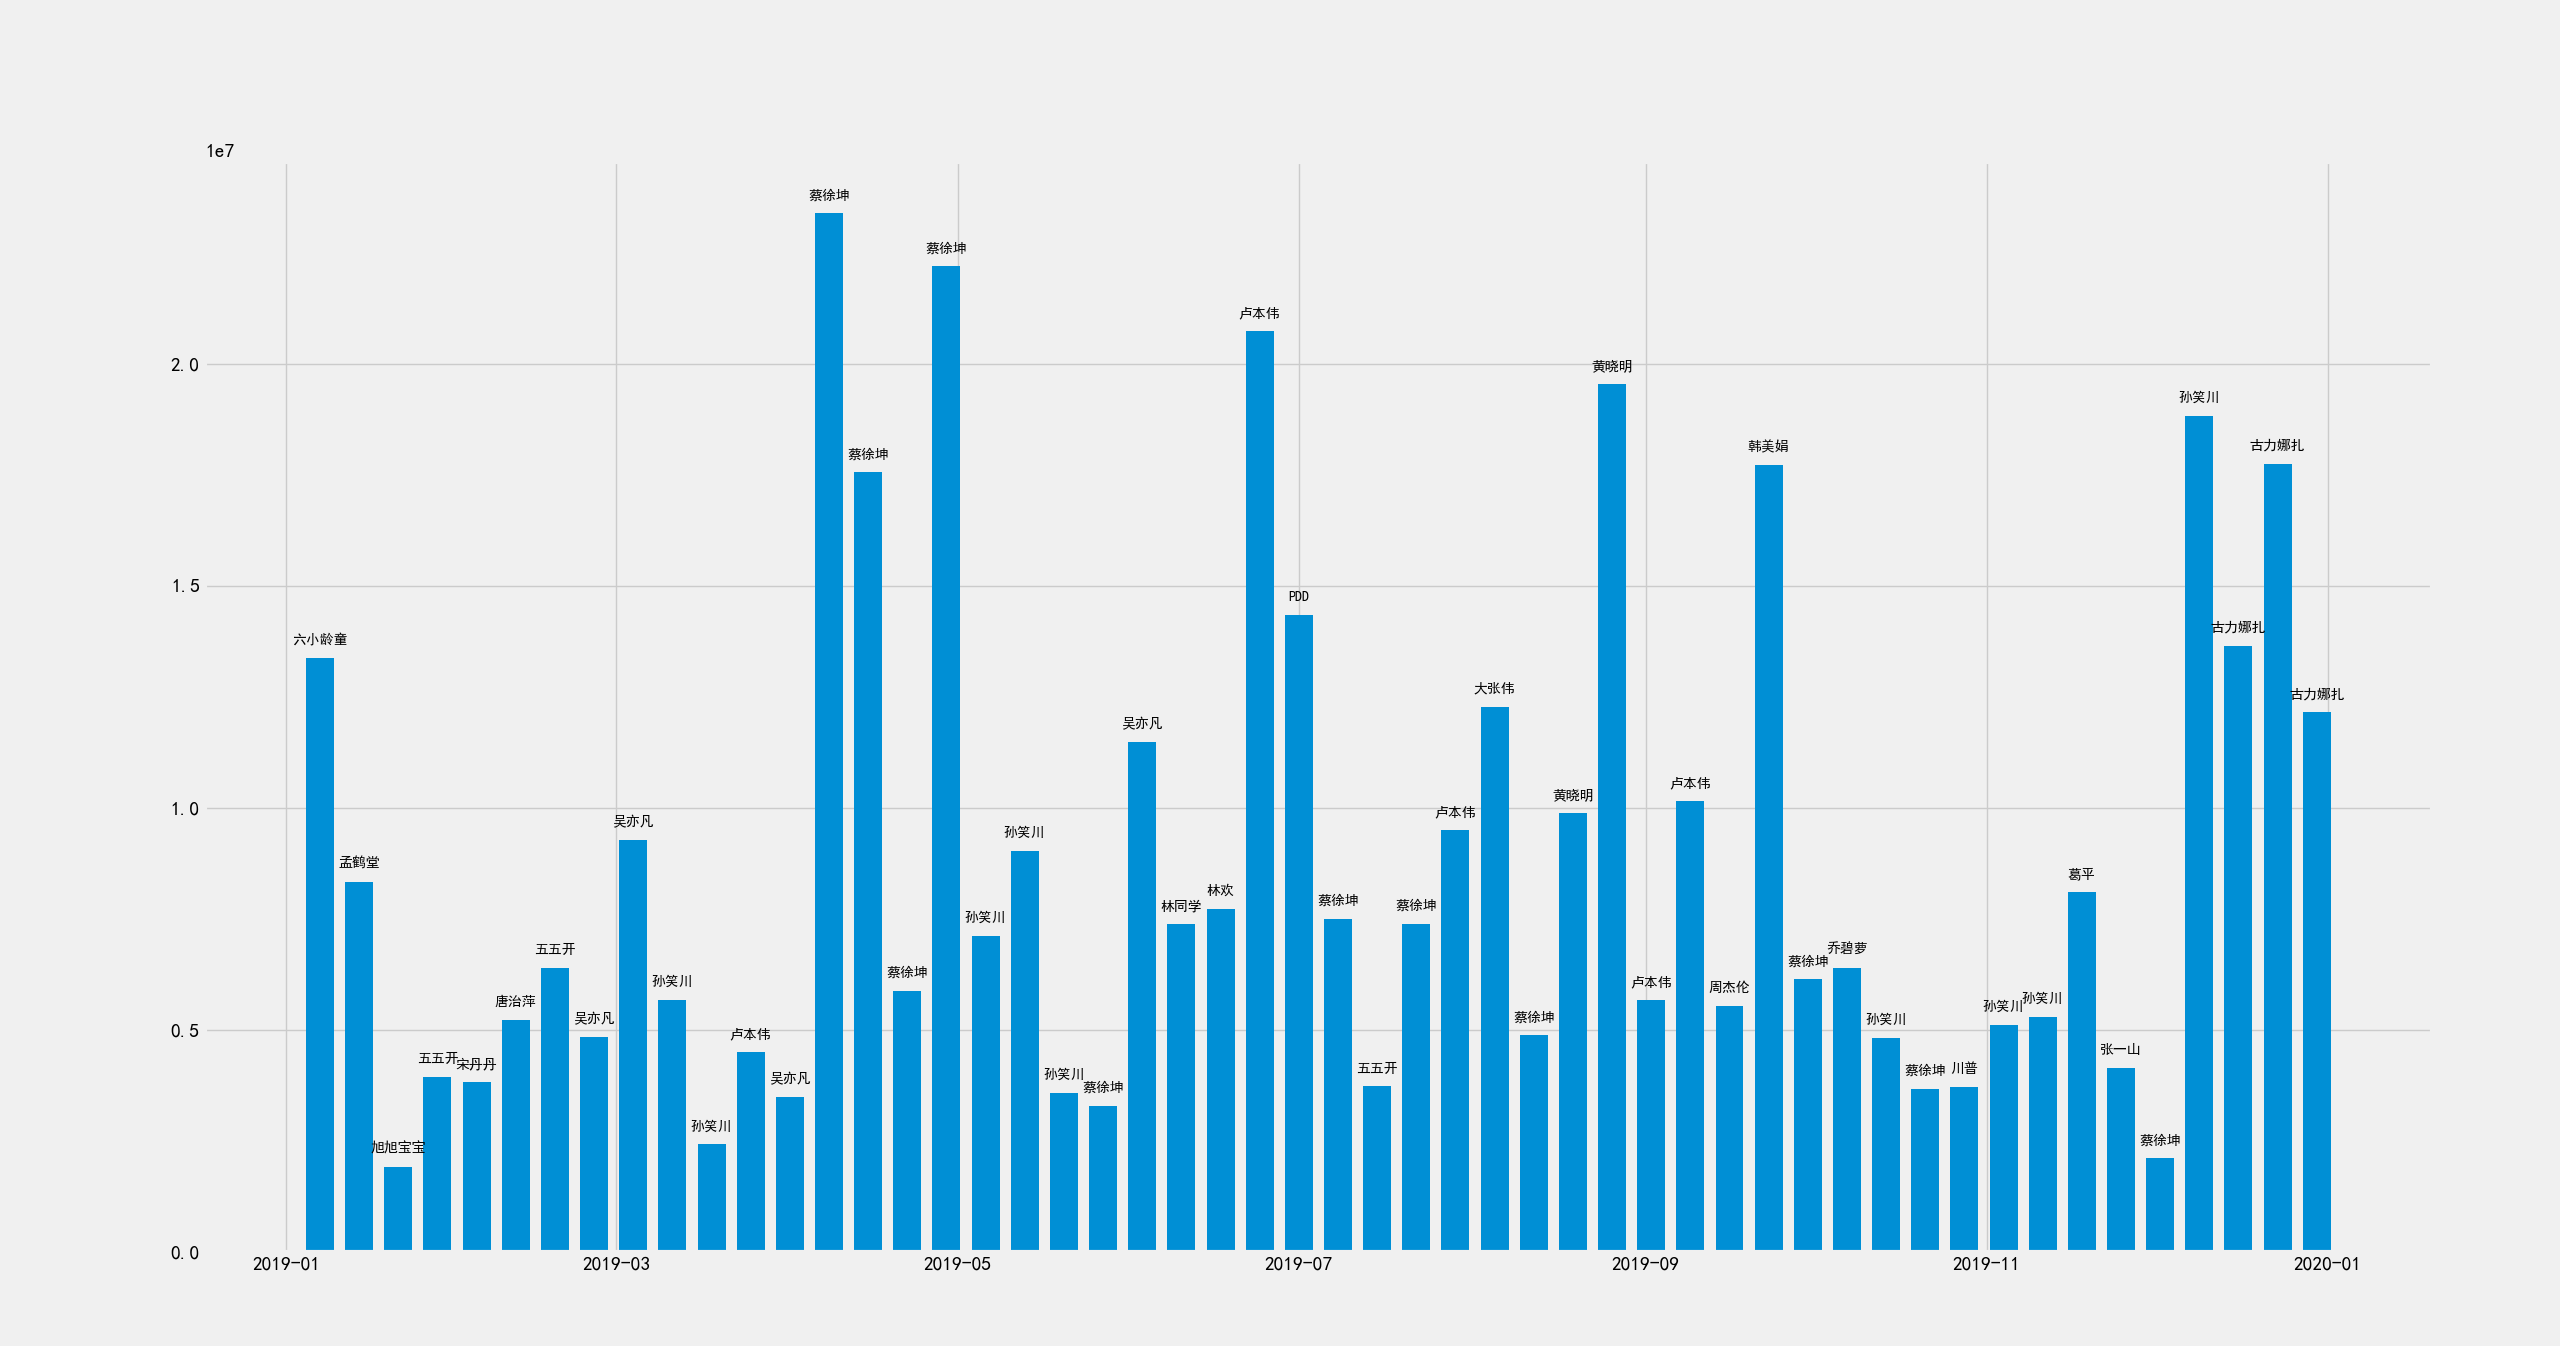
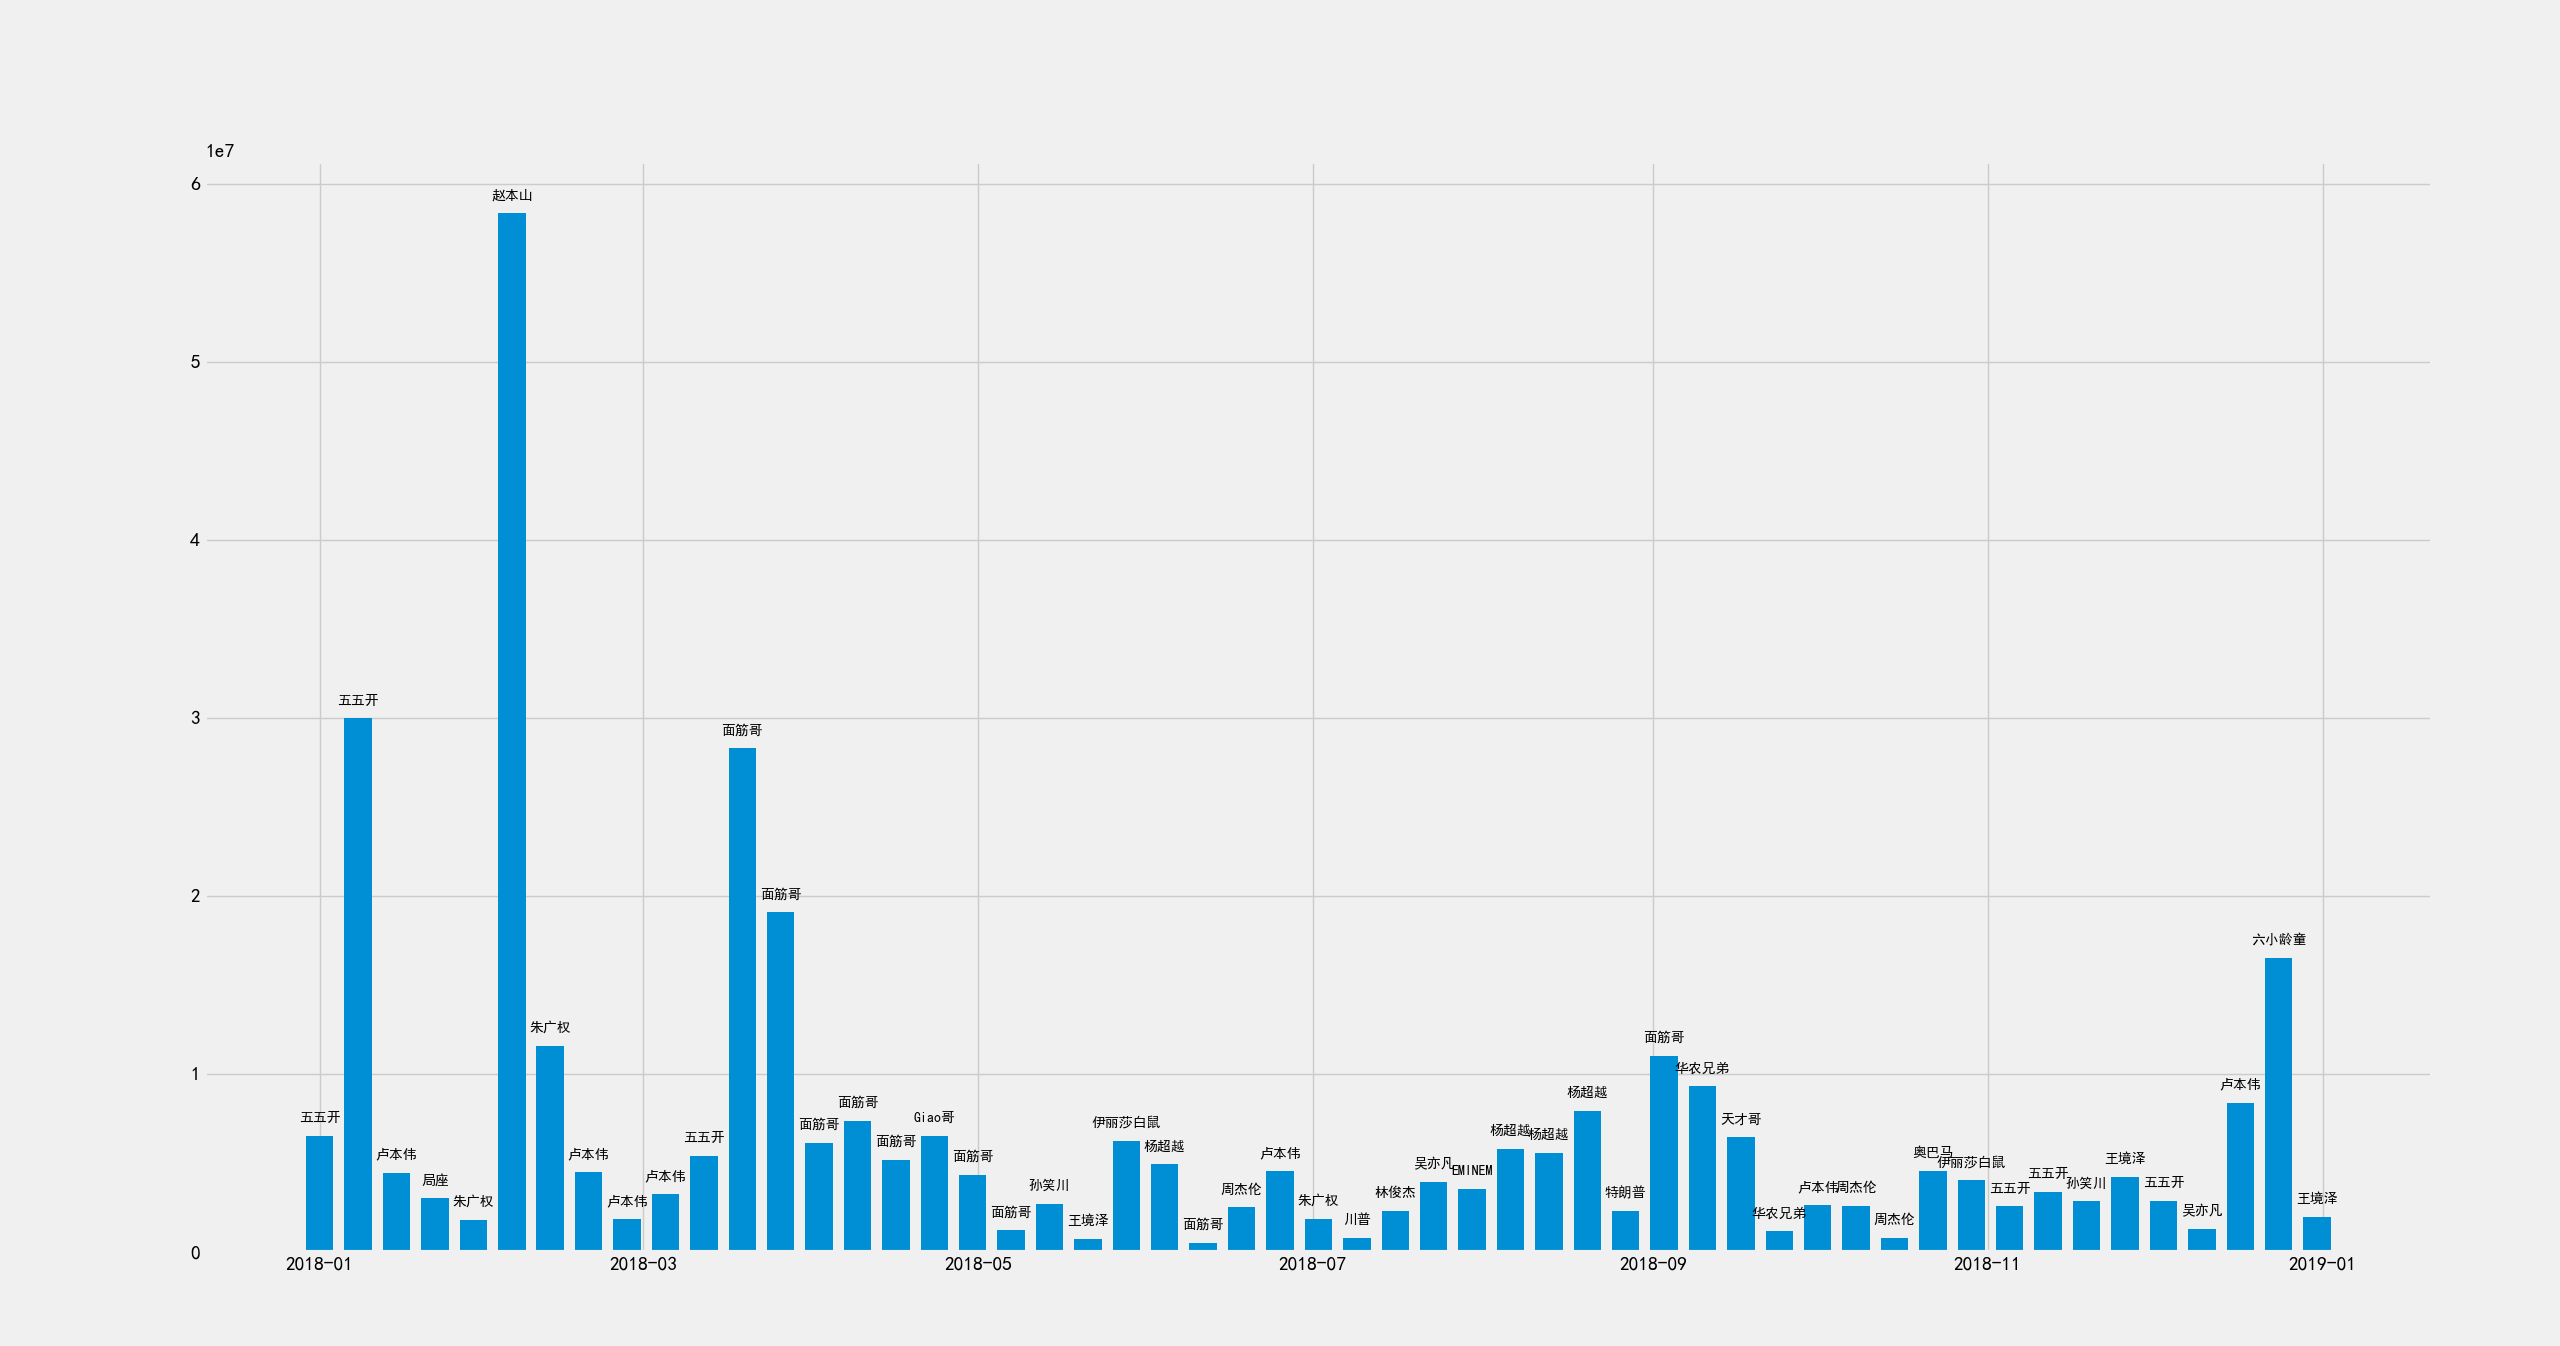

#### People come and go, but classics stay.

## Popularity demonstration of 3 idols

### Here's some fun part about Chinese newly emerged idols. Most of them became famous from talents shows and soon grew to THE megastars lacking of any dancing/acting/singing skills but were supported by huge fans base,aka the power of capital.
### The modern-day fan economy in China is very special and different from any other places. As the stars are so liked by their fans who strive to make their idols' song hit in any music charts, which is a new ritual imported from Korea k-pop culture. And these wins lead to precious opportunites. The popular stars get movies and TV shows, become brand ambassador and profit from their massive fan base.
### “No Fan, no market” is therefore the new credo in China's entertainment market. But at the meanwhile, the new rising stars don't have the abilities to shine constantly. This inevitably causes a decline in quality of Chinese pop music/TV series and movie industry.
### Conerned about this phenonmenon, I'm curious about the “Little Fresh Meat” and wondering if they are popular on Bilibili.com.


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


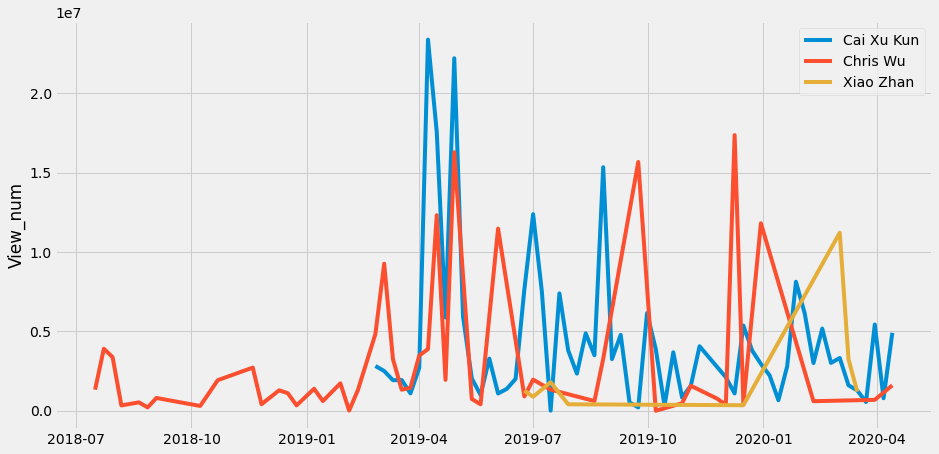

In [29]:
# I picked 3 new, good looking, discussion raised idols:
# Chirs Wu: a Chinese-Canadian actor, rapper, singer, record producer, and model. He is a former member of South Korean-Chinese boy band EXO and its subgroup EXO-M under SM Entertainment. https://en.wikipedia.org/wiki/Kris_Wu
# Cai XuKun: better known as Kun, a Chinese singer, dancer, rapper, and songwriter. He is active as a solo artist and was the leader and center of the Chinese boy group, Nine Percent. https://en.wikipedia.org/wiki/Cai_Xukun
# Xiao Zhan: also known as Sean Xiao, a Chinese actor and singer. He is a member of the male idol group X Nine. Xiao received recognition for his roles in the drama The Untamed (2019). https://en.wikipedia.org/wiki/Xiao_Zhan

plt.figure(figsize=[14, 7])
plt.plot(topplay[topplay['tag'] == '蔡徐坤']['week'],topplay[topplay['tag'] == '蔡徐坤']['play'])
plt.plot(topplay[topplay['tag'] == '吴亦凡']['week'],topplay[topplay['tag'] == '吴亦凡']['play'])
plt.plot(topplay[topplay['tag'] == '肖战']['week'],topplay[topplay['tag'] == '肖战']['play'])
plt.ylabel('View_num')
plt.legend(labels = ['Cai Xu Kun','Chris Wu','Xiao Zhan'], loc = 'best')

### The red line is the video viewer count of Chris Wu. The spikes are respectively the following events:
* Became a mentor in *The Rap of China*, a Chinese rap reality show.
* New movie *Never Gone* released where he plays the leading actor part.
* The continous halo effects of TV and reality shows.
* New EP released where he underbrags himself as people were talking about his not-so-good improvised rap performance in a reality show.(yes, he's in several reality shows.)
* People compare his with the new star Cai Xu Kun.
* The end of year All Star Auto-tune recap.

Despite the tendency that idols are more likely to be overrated by their fans, Chris Wu seems to progress in 2019. Espeically after his well-received EP: 大碗宽面 *Big Bowl Thick Noodle*, where he admited that his rap performance is not that good but he was always happy to amuse others. This modest gesture, making fun of himself, gained some idol points for him.

### The blue line is the video viewer count of Cai Xu Kun, the newly rising star from a tanlent show.
He claims to be good at singing/dancing/rap/basketball skills and Bilibili users are more than happy to promote.

Despite the lack of work, he constantly stays on the chart. And his popularity didn't get weak after the young rap star sued Bilibili for inaction of auto-tune videos in April 2019.


### The yellow line is a new actor came into the public sight thanks to a bromance/BL TV series around July 2019.
While that TV show is not so attractive to bilibili fans, he hit TOP 1 in the chart later in March 2020 as his fans tip-off the AO3 (Archive of Our Own) website to china government, pushing the latter to put a ban on the fanfiction website and hence starting a huge discuss of responsibilities of idols and boundries of fans.
As him and his fans gave the content creation platform a hard time, some screenwriters/directors and other creators have made an annoncement of not using the new star ever again. The water that bears the boat is the same that swallows it up.

In [30]:
# Get the detail info for these 3.

cai = []
for i in range(len(dataall)):
    try:
        if '蔡徐坤' in dataall.loc[i,'tag_list']:
            cai = cai + [str(i)]
        else:
            pass
    except TypeError as reason:
        print(str(reason) + str(i))
        
cai_data = dataall.iloc[cai]

wu = []
for i in range(len(dataall)):
    try:
        if '吴亦凡' in dataall.loc[i,'tag_list']:
            wu = wu + [str(i)]
        else:
            pass
    except TypeError as reason:
        print(str(reason) + str(i))
        
wu_data = dataall.iloc[wu]

xiao = []
for i in range(len(dataall)):
    try:
        if '肖战' in dataall.loc[i,'tag_list']:
            xiao = xiao + [str(i)]
        else:
            pass
    except TypeError as reason:
        print(str(reason) + str(i))
        
xiao_data = dataall.iloc[xiao]

wu_data.head()

,url,tag,mid,tit,review,play,danmu,fav,aid,start,end,tag_list
1710,http://www.bilibili.com/video/av27238431,"鬼畜调教,全明星rap,忍者,吴亦凡,中国新说唱",40966108,【全明星说唱】一首动感的忍者也太skr了,2059,1327977,5319,40677,27238431,20180716,20180722,"[鬼畜调教, 全明星rap, 忍者, 吴亦凡, 中国新说唱]"
1769,http://www.bilibili.com/video/av27801961,"鬼畜调教,吴亦凡,某幻君,鸟语十级,倒悬的橘子",40966108,【某幻君rap】当B站知名UP主遇到中国新说唱...,10656,3909035,18881,153318,27801961,20180723,20180729,"[鬼畜调教, 吴亦凡, 某幻君, 鸟语十级, 倒悬的橘子]"
1831,http://www.bilibili.com/video/av28580701,"鬼畜调教,恶搞,孙笑川,吴亦凡,来自星星的你,skr,嘻哈",283538,【冷面作品】《来自加拿带的你》 孙笑川 · 吴亦凡,11961,3381419,18457,69872,28580701,20180730,20180805,"[鬼畜调教, 恶搞, 孙笑川, 吴亦凡, 来自星星的你, skr, 嘻哈]"
1865,http://www.bilibili.com/video/av28654488,"音MAD,千本樱,原曲不使用,skr,吴亦凡,diss,加拿大电鳗,中国新说唱,skr乐器",8678097,【吴亦凡】千本skr-这歌没混直接发！,400,59736,293,380,28654488,20180806,20180812,"[音MAD, 千本樱, 原曲不使用, skr, 吴亦凡, diss, 加拿大电鳗, 中国新说..."
1912,http://www.bilibili.com/video/av28704069,"鬼畜调教,朱广权,吴亦凡,skr,rap",25911961,【朱广权rap】热skrrrr人!feat.吴亦凡,720,276459,1202,6304,28704069,20180806,20180812,"[鬼畜调教, 朱广权, 吴亦凡, skr, rap]"


## Comment Bullets(Danmaku) Analysis

#### The release of 大碗宽面 makes me wonder if bilibili fans changes attitude towards Chris Wu.

In [31]:
# Here's the tricky part, if we want to scrap Danmaku from a video, we need to get the cid first.
# This time we use Request, becuase the unicode problem.

def get_cid(aid):
    # print(aid)
    url = "https://www.bilibili.com/video/av"+aid
    r = requests.get(url, headers=header)
    match_list = re.findall('"stat":{"aid":'+aid+'.*?"cid":\d*?,', r.text)
    if len(match_list) == 0:
        print('============================================')
        print(str(aid))
        print('============================================')
        cid = ""
    else:
    # print (match_list)
        cid = match_list[0][match_list[0].index('cid')+5:-1]
        print ("cid = " + cid)
    return cid


In [32]:
# I pick this video becuase it's a fun video. 
# It is about Wu's famous not-so-good rap impromptu remix with Lady Gaga's Poker Face.
# Note this clip was before the release of Wu's EP.

wu_data.loc[3691]

url                  http://www.bilibili.com/video/av45559730
tag         吴亦凡,poker face,鬼畜,电鳗,skr,大碗宽面,欠我的用什么还,潮汕好男人,MC...
mid                                                  19071708
tit                                           【吴亦凡】poker face
review                                                   1706
play                                                  1323279
danmu                                                    2795
fav                                                     29337
aid                                                  45559730
start                                                20190304
end                                                  20190310
tag_list    [吴亦凡, poker face, 鬼畜, 电鳗, skr, 大碗宽面, 欠我的用什么还, ...
Name: 3691, dtype: object

In [33]:
# Create header and get the cid.

header = {
    'Accept-Language': 'zh-CN,zh;q=0.8',
    'Referer': 'http://www.bilibili.com/',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:45.0) Gecko/20100101 Firefox/45.0'
}

get_cid('45559730')

cid = 79773675


'79773675'

In [34]:
# Using cid we can now locate the danmaku for a video. 
# And because there are simply too many danmaku, bilibili clears some of them from time to time. So we also need to retrieve historical data.

def get_danmuku(cid,date):
    danmuku_api = "https://api.bilibili.com/x/v2/dm/history?type=1&oid={}&date={}".format(str(cid),str(date))
    r2 =requests.get(danmuku_api, headers=header)
    soup = BeautifulSoup(r2.content, 'lxml')
    danmus = soup.find_all('d')
    content = []
    t1 = []
    timestr = []
    for danmu in danmus:
        content = content + [danmu.string]
        attr = danmu['p'].split(',')
        t1 = t1 + [str(attr[0])]
        t2 = attr[4]
        timestr = timestr + [time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(float(t2)))]
    danmaku = pd.DataFrame(list(zip(content,t1, timestr)), 
               columns =['conent','t_video', 'time_real'])
    return danmaku

In [35]:
# Get the daily danmaku, and simply combine together.

def getall(cid,start, end):
    date_pointer = datetime.strptime(start, '%Y-%m-%d').date()
    while date_pointer <= datetime.strptime(end, '%Y-%m-%d').date():
        danmaku = get_danmuku(str(cid), str(date_pointer))
        danmaku_all = pd.DataFrame()
        danmaku_all = danmaku_all.append(danmaku)
        date_pointer += timedelta(days=1)
    return danmaku_all

In [36]:
# For historical danmaku, we need to login.

header = {
        'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36', 
                     'Cookie': "l=v; _uuid=C6B1B71C-8DFE-7F26-C786-F74F9000A54535885infoc; LIVE_BUVID=AUTO2415744214359471; CURRENT_FNVAL=16; sid=lshjf3et; stardustvideo=1; rpdid=|(umu)ukYY)k0J'ul~Rl|||Rm; laboratory=1-1; stardustpgcv=0606; im_notify_type_8950700=0; INTVER=1; CURRENT_QUALITY=80; buvid3=9EDB7255-52DF-401B-B1D9-F909000AB196155816infoc; DedeUserID=8950700; DedeUserID__ckMd5=bf19e4ca395f1eca; SESSDATA=4297ed45%2C1599117382%2C0f227*31; bili_jct=3344d49c3da9bb2b0b646bf0bddb8383; bp_t_offset_8950700=363949515715854964"
}

In [37]:
# The new EP 大碗宽面 is release 2019.04.19, so we divide the danmaku into BEFORE and AFTER.

cid = '79773675'
getall1 = getall(cid,'2019-03-07', '2019-03-16')
getall2 = getall(cid,'2019-04-19', '2019-04-28')

In [38]:
# collect all danmaku together in a str

danmulist1=str()
for i in range(len(getall1)):
    danmulist1 = danmulist1 + str(getall1['conent'][i]) + ','

danmulist2=str()
for i in range(len(getall2)):
    danmulist2 = danmulist2 + str(getall2['conent'][i]) + ','

# import Word Segmentation Dictionary
import jieba

In [39]:
# Add and delete some words for our case

jieba.add_word('蔡徐坤')
jieba.add_word('文体两开花')
jieba.add_word('两开花')
jieba.add_word('防抑郁')
jieba.add_word('苏韵锦')
jieba.add_word('有才')
jieba.add_word('潮男')
jieba.add_word('奥利给')
jieba.add_word('烦烦')
jieba.add_word('有才')
jieba.add_word('⚡')
jieba.add_word('梁非凡') 
jieba.add_word('非凡哥')
jieba.add_word('大碗宽面')
jieba.add_word('杨超越')
jieba.add_word('瓜怂')
jieba.add_word('我错了')
jieba.add_word('凡凡')
jieba.add_word('抖腿')
jieba.add_word('打脸')
jieba.add_word('用什么还')
jieba.add_word('退出直播间')
jieba.add_word('邪魅一笑')
jieba.add_word('亦凡哥')
jieba.add_word('真男人')
jieba.add_word('笑死')
jieba.add_word('再来')

jieba.del_word('名')
jieba.del_word('场面')
jieba.del_word('才')
jieba.del_word('有')
jieba.del_word('潮')
jieba.del_word('男')
jieba.del_word('奥利')
jieba.del_word('给')
jieba.del_word('看烦')
jieba.add_word('名场面') 
jieba.del_word('的')
jieba.del_word('这个')
jieba.del_word('打行')
jieba.del_word('加拿')
jieba.del_word('打')
jieba.del_word('脸')
jieba.del_word('大人')
jieba.del_word('我错')
jieba.del_word('之作')
jieba.del_word('直播')
jieba.del_word('共')
jieba.del_word('邪')
jieba.del_word('真')
jieba.del_word('亦')
jieba.del_word('退出')

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.054 seconds.
Prefix dict has been built successfully.


In [40]:
# Word Seperation

seg_list1=jieba.cut_for_search(danmulist1)
word_split1 = ' '.join(seg_list1)

seg_list2=jieba.cut_for_search(danmulist2)
word_split2 = ' '.join(seg_list2)

(-0.5, 5999.5, 2999.5, -0.5)

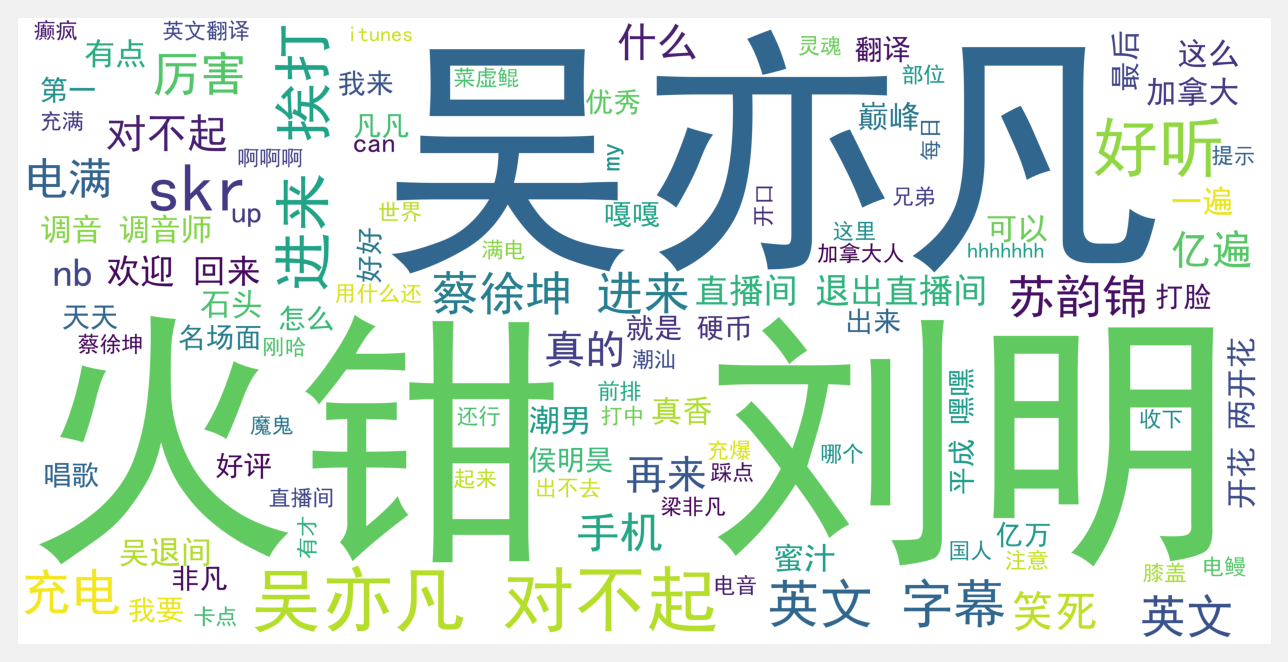

In [41]:
danmuwc1 = WordCloud(max_words=100, 
               #stopwords=stop_word,
               scale = 15,
              #max_font_size=200, 
              background_color='white',
              font_path=font_path,
              stopwords=['哈哈','哈哈哈','哈哈哈哈'],
               #width=1000, 
               #height=860 
              )
#image_colors = ImageColorGenerator(back_color)
plt.figure(figsize=(8,8),dpi=180)
danmuwc1.generate(word_split1)
plt.imshow(danmuwc1)
plt.axis('off')


#### The Before-EP Danmaku style is more of a sarcasm and discussion about the content.

(-0.5, 5999.5, 2999.5, -0.5)

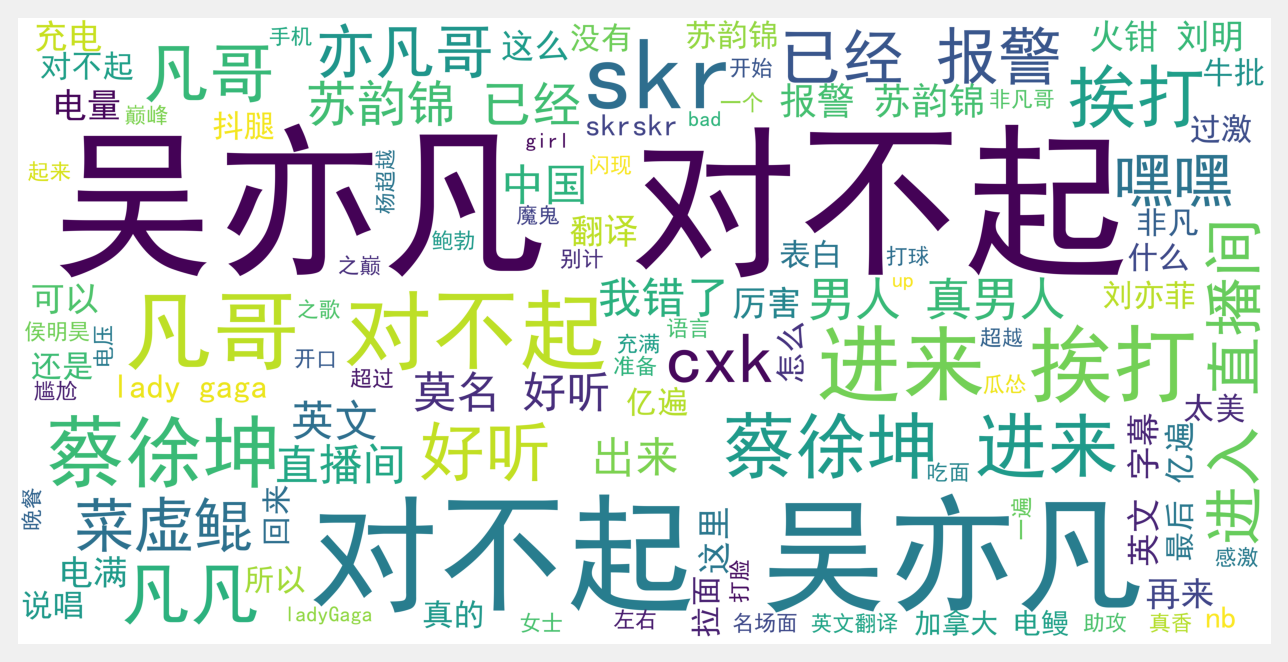

In [42]:
danmuwc2 = WordCloud(max_words=100, 
               #stopwords=stop_word,
               scale = 15,
              #max_font_size=200, 
              background_color='white',
              font_path=font_path,
              stopwords=['哈哈','哈哈哈','哈哈哈哈'],
               #width=1000, 
               #height=860 
              )
#image_colors = ImageColorGenerator(back_color)
plt.figure(figsize=(8,8),dpi=180)
danmuwc2.generate(word_split2)
plt.imshow(danmuwc2)
plt.axis('off')

#### The After-EP Danmaku style is full of apologizes. Partly because the EP 大碗宽面, partly because they think Cai XuKun is worse.

## Recap

* We used two approach to scrape a website.
* We used wordcloud to see the most popular contents on Bilibili.com and get an idea about people's sentiment change before and after a rapper's EP release.
* We analyzed the Bilibili video tags and learnt the top 10 celebrities/events/materials for each week/each year.
* We compared 3 "little fresh meat" idols by their viewer number.